# Klasifikatoriai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_4932\265554930.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
%matplotlib inline

In [3]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://www.indushealthplus.com/media/article_img/heart-attack-facts-awareness-thumb.jpg)

# Užduotis

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):
* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)
* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.
* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.
* paruoškite duomenis modelio apmokymui
* apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite *confusion* matricas.
* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite *confusion* matricą.
* kuris modelis efektyviausias? Palyginkite *confusion* matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Stulpelių paaiškinimai anglų kalba:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

*dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti :)*

<Axes: ylabel='count'>

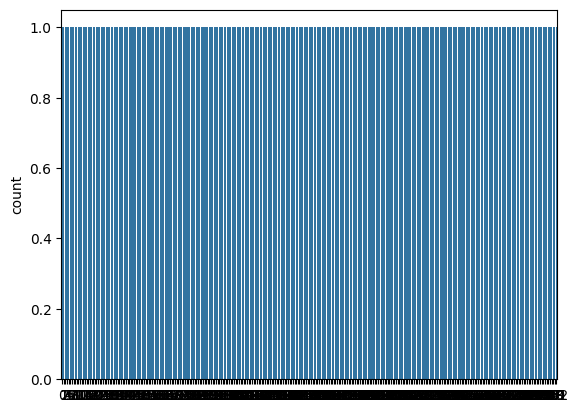

In [7]:
sns.countplot(heart['target'])


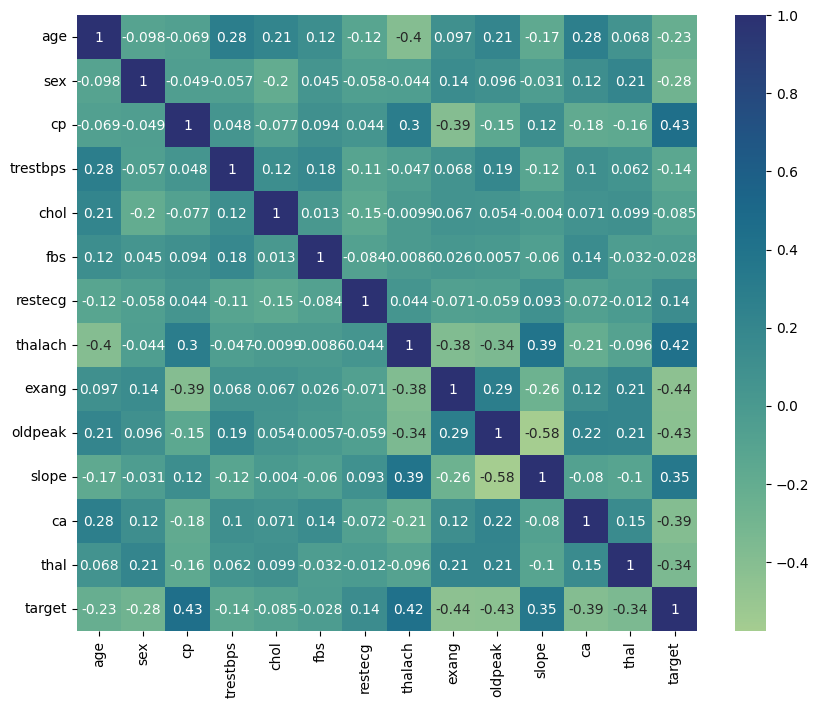

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
mtx = sns.heatmap(heart.corr(), annot=True, cmap='crest')

In [13]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

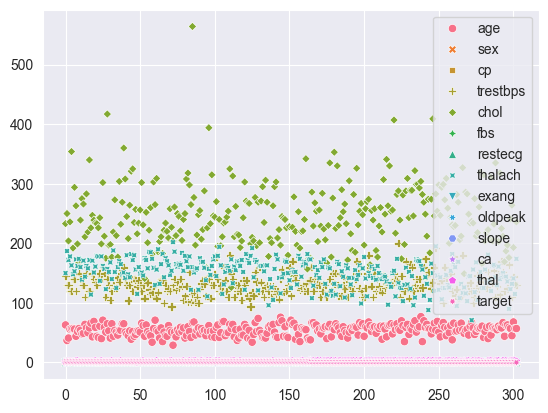

In [23]:
sns.set_style('darkgrid')
sns.scatterplot(data=heart)

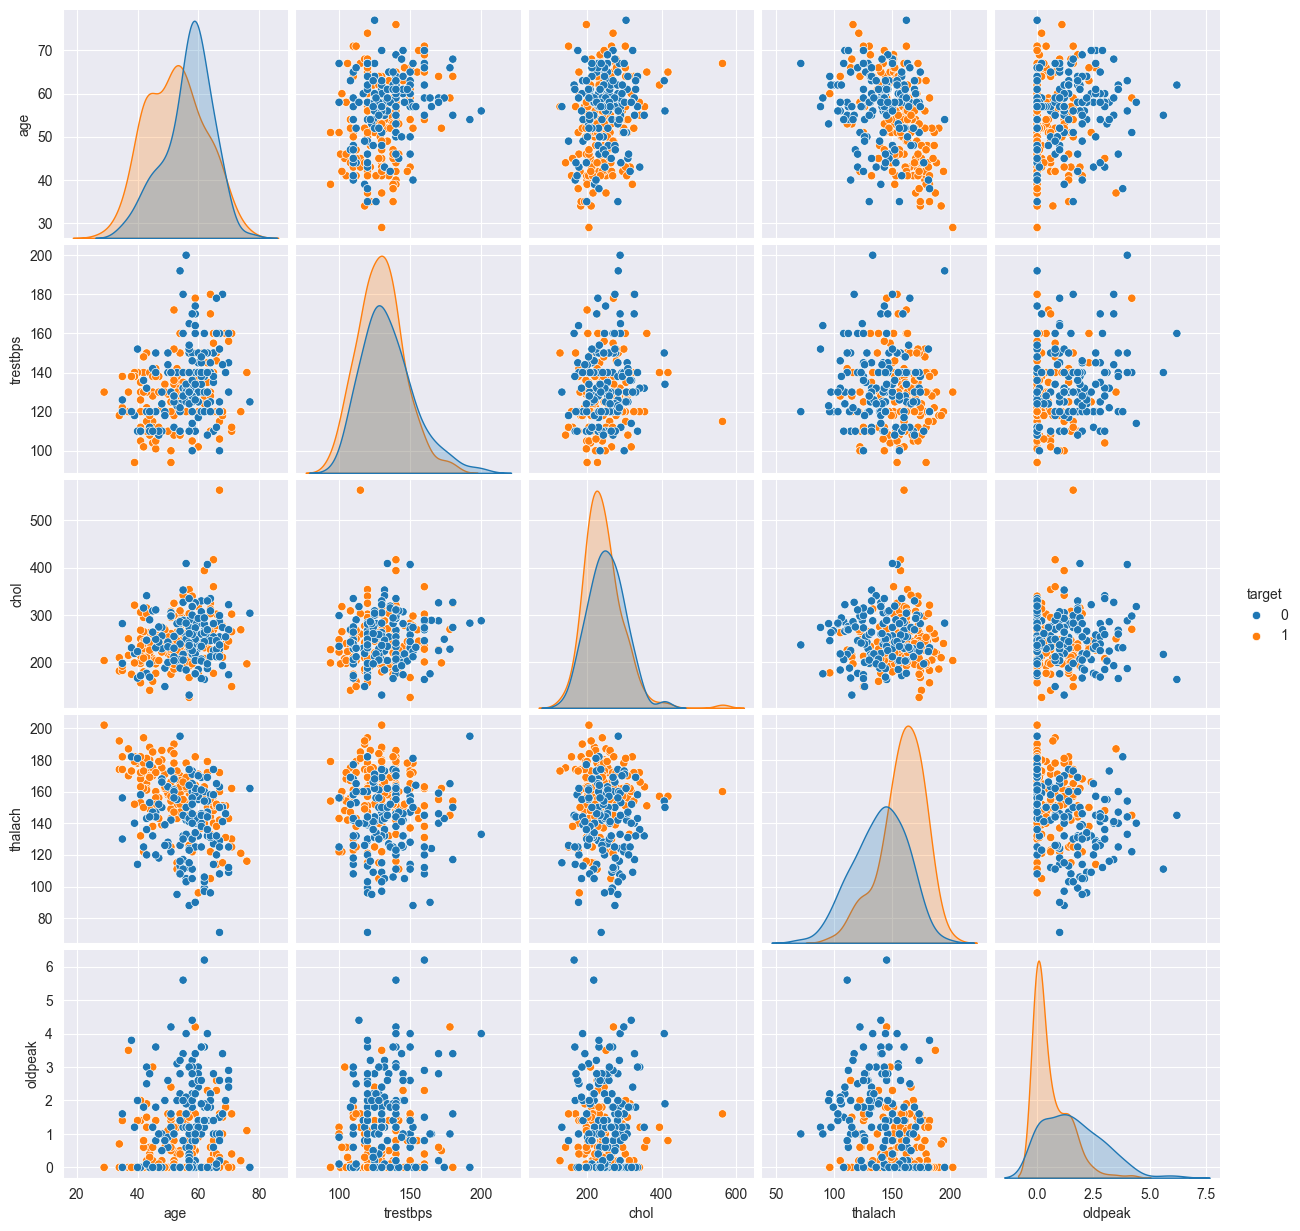

In [24]:
sns.pairplot(heart.drop(columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']), hue= 'target')

In [25]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [26]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [28]:
heart['slope'].unique()

array([0, 2, 1], dtype=int64)

In [29]:
heart['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [30]:
heart['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [ ]:
dummies_ca =